In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from toy_tools import *

In [20]:
def readout(fr, thres, delay):
    t = []
    out = []
    
    triggered = False
    i = 0
    for j, _ in enumerate(fr):
        if  not triggered and np.sum(fr[i:j+1]) > thres:
            t.append(j)
            out.append(np.sum(fr[i:j+delay]))
            triggered = True
            i = j+delay+1
            # print(triggered, j, j+delay, np.sum(fr[i:j+1]), np.sum(fr[j:j+delay]))
        if triggered and j>=i:
            triggered = False

    return np.array([t, out])

In [50]:
def run():
    pos = 8700
    q = 30_600
    delay = 15
    thres = 6_000
    
    unit_fr = load_fr_ctr('response_44_v2a_100ns.npy')
    q0 = q*np.ones(1)
    # from toy_translation.ipynb
    r = 20
    sigma = 2
    q1 = q_gaus(q=q, r=21, sigma=sigma)
    fr0 = fr_record(q0, pos, unit_fr)
    fr1 = fr_record(q1, pos, unit_fr)

    r0 = readout(fr0, thres=thres, delay=delay)
    r1 = readout(fr1, thres=thres, delay=delay)

    print(r0)
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(5*2, 3))
    ax0.set_title('charge * field response')
    ax1.set_title('charge * field response')
    ax0.plot(fr0, label='qDelta * fr')
    ax0.plot(fr1, label='qGaus * fr')
    ax1.plot(fr0, label='qDelta * fr')
    ax1.plot(fr1, label='qGaus * fr')
    ax1.set_xlim(800, 1300)
    ax0.legend()
    ax1.legend()

    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(5*2, 3))
    ax0.plot(np.add.accumulate(fr0), label='qDelta * fr')
    ax0.bar(r0[0], np.add.accumulate(r0[1]), width=delay, color='r', align='edge', label='readout')
    ax0.set_title('accumulation')
    ax1.plot(np.add.accumulate(fr0), label='qDelta * fr')
    ax1.bar(r0[0], np.add.accumulate(r0[1]), width=delay, color='r', align='edge', label='readout')
    ax1.set_xlim(800, 1300)
    ax1.set_title('accumulation; zoom')
    ax0.legend()
    ax1.legend()

    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(5*2, 3))
    ax0.plot(np.add.accumulate(fr1), label='qGaus * fr')
    ax0.bar(r1[0], np.add.accumulate(r1[1]), width=delay, color='r', align='edge', label='readout')
    ax0.set_title('accumulation')
    ax1.plot(np.add.accumulate(fr1), label='qGaus * fr')
    ax1.bar(r1[0], np.add.accumulate(r1[1]), width=delay, color='r', align='edge', label='readout')
    ax1.set_xlim(800, 1300)
    ax1.set_title('accumulation; zoom')
    ax0.legend()
    ax1.legend()

shape of center region (5, 5, 2000)
integration of first 700 ticks 0.0010430221411030683
drop first 700 ticks and renormalize
[[ 1179.          1196.        ]
 [18770.61259769  9566.28384387]]


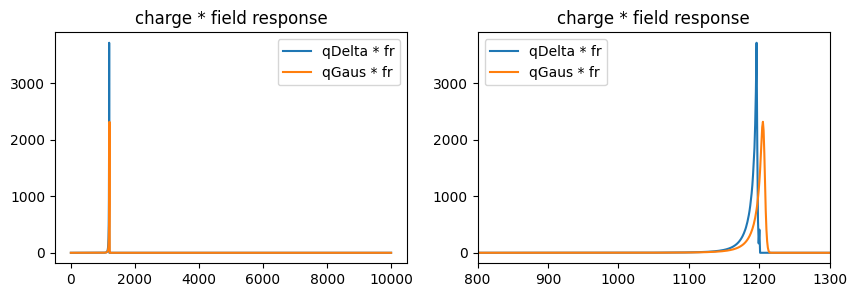

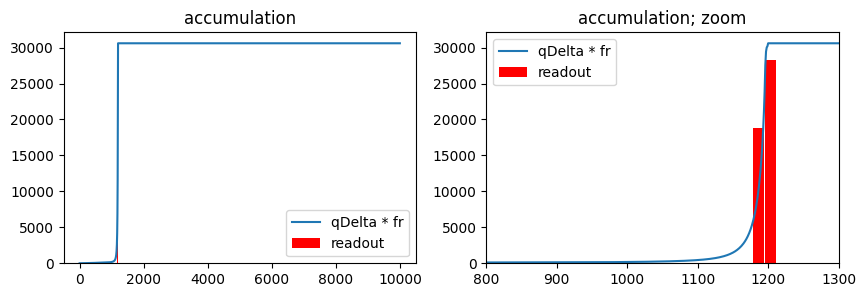

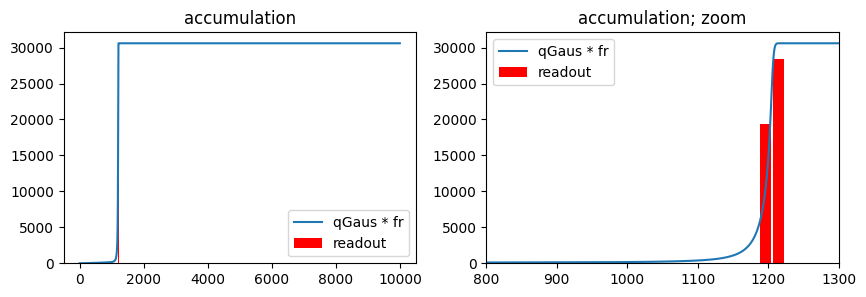

In [51]:
run()